# Day 5
Puzzle 1

In [508]:
import numpy as np
import math

In [509]:
input_file = 'input_1.txt'
# input_file = 'test_input_1.txt'
# input_file = 'test_input_2.txt'

Extract ordering tuples and updates.

In [510]:
with open(file=input_file, mode='r') as file:
    ordering_tuples = []
    updates = []
    done_reading_orderings = False

    for line in file:
        if not done_reading_orderings and line.isspace():
            done_reading_orderings = True
            continue

        elif not done_reading_orderings:
            ordering_tuple = line.strip().split('|')
            ordering_tuple = tuple(int(val) for val in ordering_tuple)
            ordering_tuples.append(ordering_tuple)

        else:
            update = line.strip().split(',')
            update = [int(val) for val in update]
            updates.append(update)

In [511]:
ordering_tuples[:20]

[(58, 55),
 (89, 38),
 (89, 34),
 (85, 64),
 (85, 25),
 (85, 43),
 (71, 97),
 (71, 17),
 (71, 85),
 (71, 87),
 (91, 77),
 (91, 67),
 (91, 35),
 (91, 85),
 (91, 44),
 (49, 43),
 (49, 27),
 (49, 38),
 (49, 75),
 (49, 34)]

In [512]:
updates[:20]

[[98, 85, 15, 24, 46, 97, 19, 89, 87, 44, 57],
 [64, 39, 94, 19, 49, 27, 85, 36, 23],
 [17, 71, 97, 93, 49, 43, 24, 76, 62, 98, 27, 87, 38, 19, 44, 89, 78],
 [13, 71, 57, 79, 76, 24, 36, 67, 77, 74, 19],
 [79, 71, 45, 17, 87, 49, 43],
 [53, 91, 75, 84, 15, 79, 46, 24, 36, 71, 98, 19, 85, 97, 93, 35, 44],
 [49, 43, 38, 11, 48, 83, 86, 13, 53, 91, 75],
 [62, 94, 51, 72, 47, 48, 74, 86, 13, 53, 59, 75, 67, 15, 77],
 [97, 38, 62, 39, 45, 36, 49, 23, 35, 43, 78, 89, 94, 27, 71, 44, 19, 93, 85],
 [94,
  51,
  83,
  47,
  91,
  13,
  67,
  72,
  86,
  11,
  59,
  25,
  84,
  79,
  57,
  74,
  34,
  77,
  48,
  58,
  15,
  55,
  53],
 [34, 91, 49, 23, 43, 13, 53, 74, 86, 78, 55, 62, 94],
 [97, 17, 35, 87, 39, 78, 64, 49, 38, 51, 25],
 [17, 35, 87, 89, 78, 64, 43, 38, 62, 94, 51, 72, 11, 55, 34],
 [45,
  71,
  93,
  64,
  35,
  39,
  89,
  76,
  98,
  44,
  24,
  27,
  49,
  17,
  78,
  46,
  38,
  85,
  97,
  43,
  23],
 [23, 35, 27, 72, 89, 47, 38, 43, 44],
 [77, 57, 46, 36, 98, 19, 85, 97, 3

Loop through updates and ordering tuples to check if the values of the updates are correctly oredered.

In [513]:
correct_updates_middle_value_sum = 0

for update in updates:
    update_ok = False
    number_of_tuples_remaining = math.comb(len(update), 2)  # The maximum number of possible ordering tuples for the current update.
    
    for ordering_tuple in ordering_tuples:
        if ordering_tuple[0] in update and ordering_tuple[1] in update:
            if update.index(ordering_tuple[0]) < update.index(ordering_tuple[1]):
                number_of_tuples_remaining -= 1
                
                if number_of_tuples_remaining == 0:
                    update_ok = True
                    break

            else:
                break
    
    if update_ok:
        middle_val = update[int(np.floor(len(update)/2))]
        correct_updates_middle_value_sum += middle_val

In [514]:
correct_updates_middle_value_sum

5991

## Puzzle 2

Now, we want to correct the incorrect updates.

In [515]:
incorrect_updates_middle_value_sum = 0

for update in updates:
    update_ok = True
    number_of_tuples_remaining = math.comb(len(update), 2)  # The maximum number of possible ordering tuples for the current update.
    tuples_needed_for_correction = []  # We want to save the tuples needed for correction of the incorrectly ordered update.
    
    for ordering_tuple in ordering_tuples:
        if ordering_tuple[0] in update and ordering_tuple[1] in update:
            tuples_needed_for_correction.append(ordering_tuple)
            
            if not (update.index(ordering_tuple[0]) < update.index(ordering_tuple[1])):
                update_ok = False

            number_of_tuples_remaining -= 1

            if number_of_tuples_remaining == 0:
                break
    
    if not update_ok:
        first_numbers = [ordering_tuple[0] for ordering_tuple in tuples_needed_for_correction]  # Extract the first number of all ordering tuples needed for correction.
        last_numbers = [ordering_tuple[1] for ordering_tuple in tuples_needed_for_correction]  # And the last number.
        last_number = list(set(last_numbers) - set(first_numbers))  # Extract the the only number which never will occur as a first number.
        distinct_first_numbers = set(first_numbers)
        ordered_update = [0]*(len(update) - 1) + last_number  # Construct the ordered update list. Fill it with zeros and add the last_number at the last index.

        for distinct_number in distinct_first_numbers:  # Insert the distinct first numbers into the ordered update list in ascending order of occurrence.
            number_of_occurrences = first_numbers.count(distinct_number)
            ordered_update.pop(len(update) - (number_of_occurrences + 1))
            ordered_update.insert(len(update) - (number_of_occurrences + 1), distinct_number)

        middle_val = ordered_update[int(np.floor(len(update)/2))]
        incorrect_updates_middle_value_sum += middle_val

In [516]:
incorrect_updates_middle_value_sum

5479

# Bonus: A much better solution for both puzzles.

In [517]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

Create a directed graph, where the nodes and edges are added from the ordering tuples.

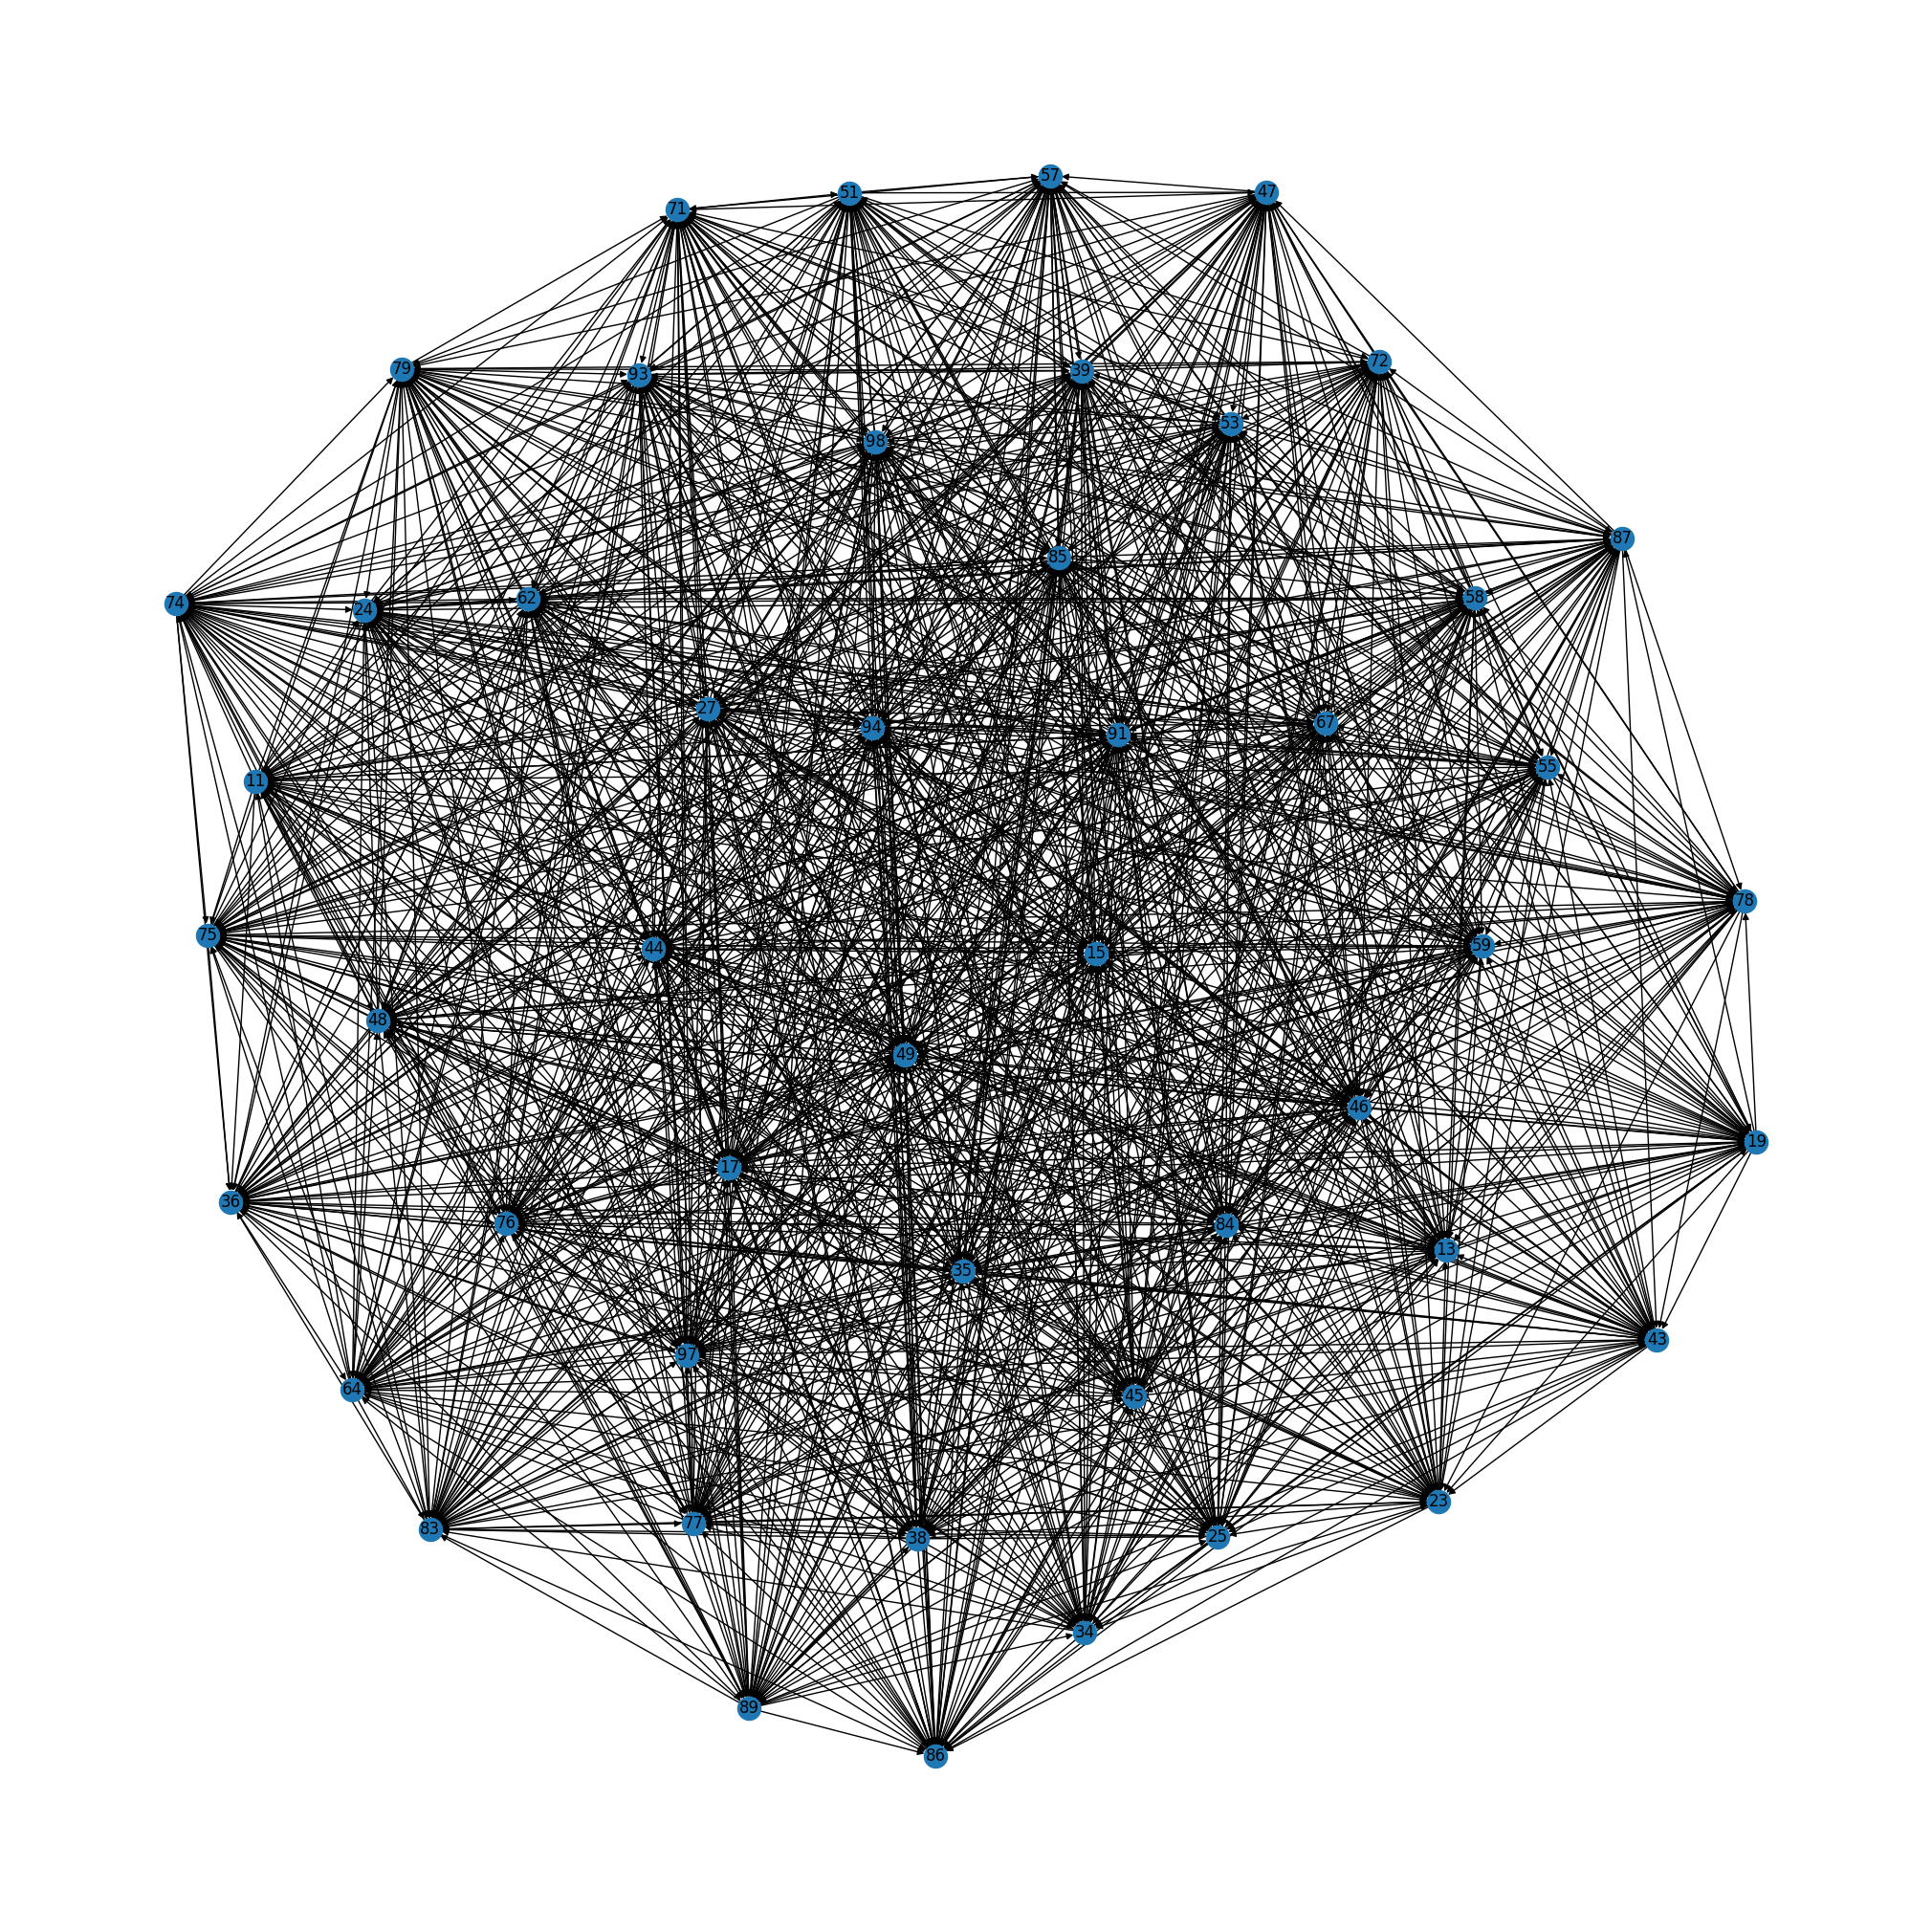

In [518]:
D = nx.DiGraph()
D.add_edges_from(ordering_tuples)
plt.figure(figsize=(20, 20))
nx.draw(D, with_labels=True)

For each update, extract a directed subgraph from D (the main graph) that cointains the nodes and edges corresponding to the values of the update. If the update is ordered in the same way as the longest path of the subgraph, it is correctly ordered. If not, it is incorrectly oredered.

In [519]:
correct_updates_middle_value_sum = 0
incorrect_updates_middle_value_sum = 0

for update in updates:
    directed_subgraph = D.subgraph(update)
    longest_path = nx.dag_longest_path(directed_subgraph)

    if update == longest_path:
        correct_updates_middle_value_sum += update[int(np.floor(len(update)/2))]

    else:
        incorrect_updates_middle_value_sum += longest_path[int(np.floor(len(update)/2))]

In [520]:
correct_updates_middle_value_sum

5991

In [522]:
incorrect_updates_middle_value_sum

5479

The last subgraph.

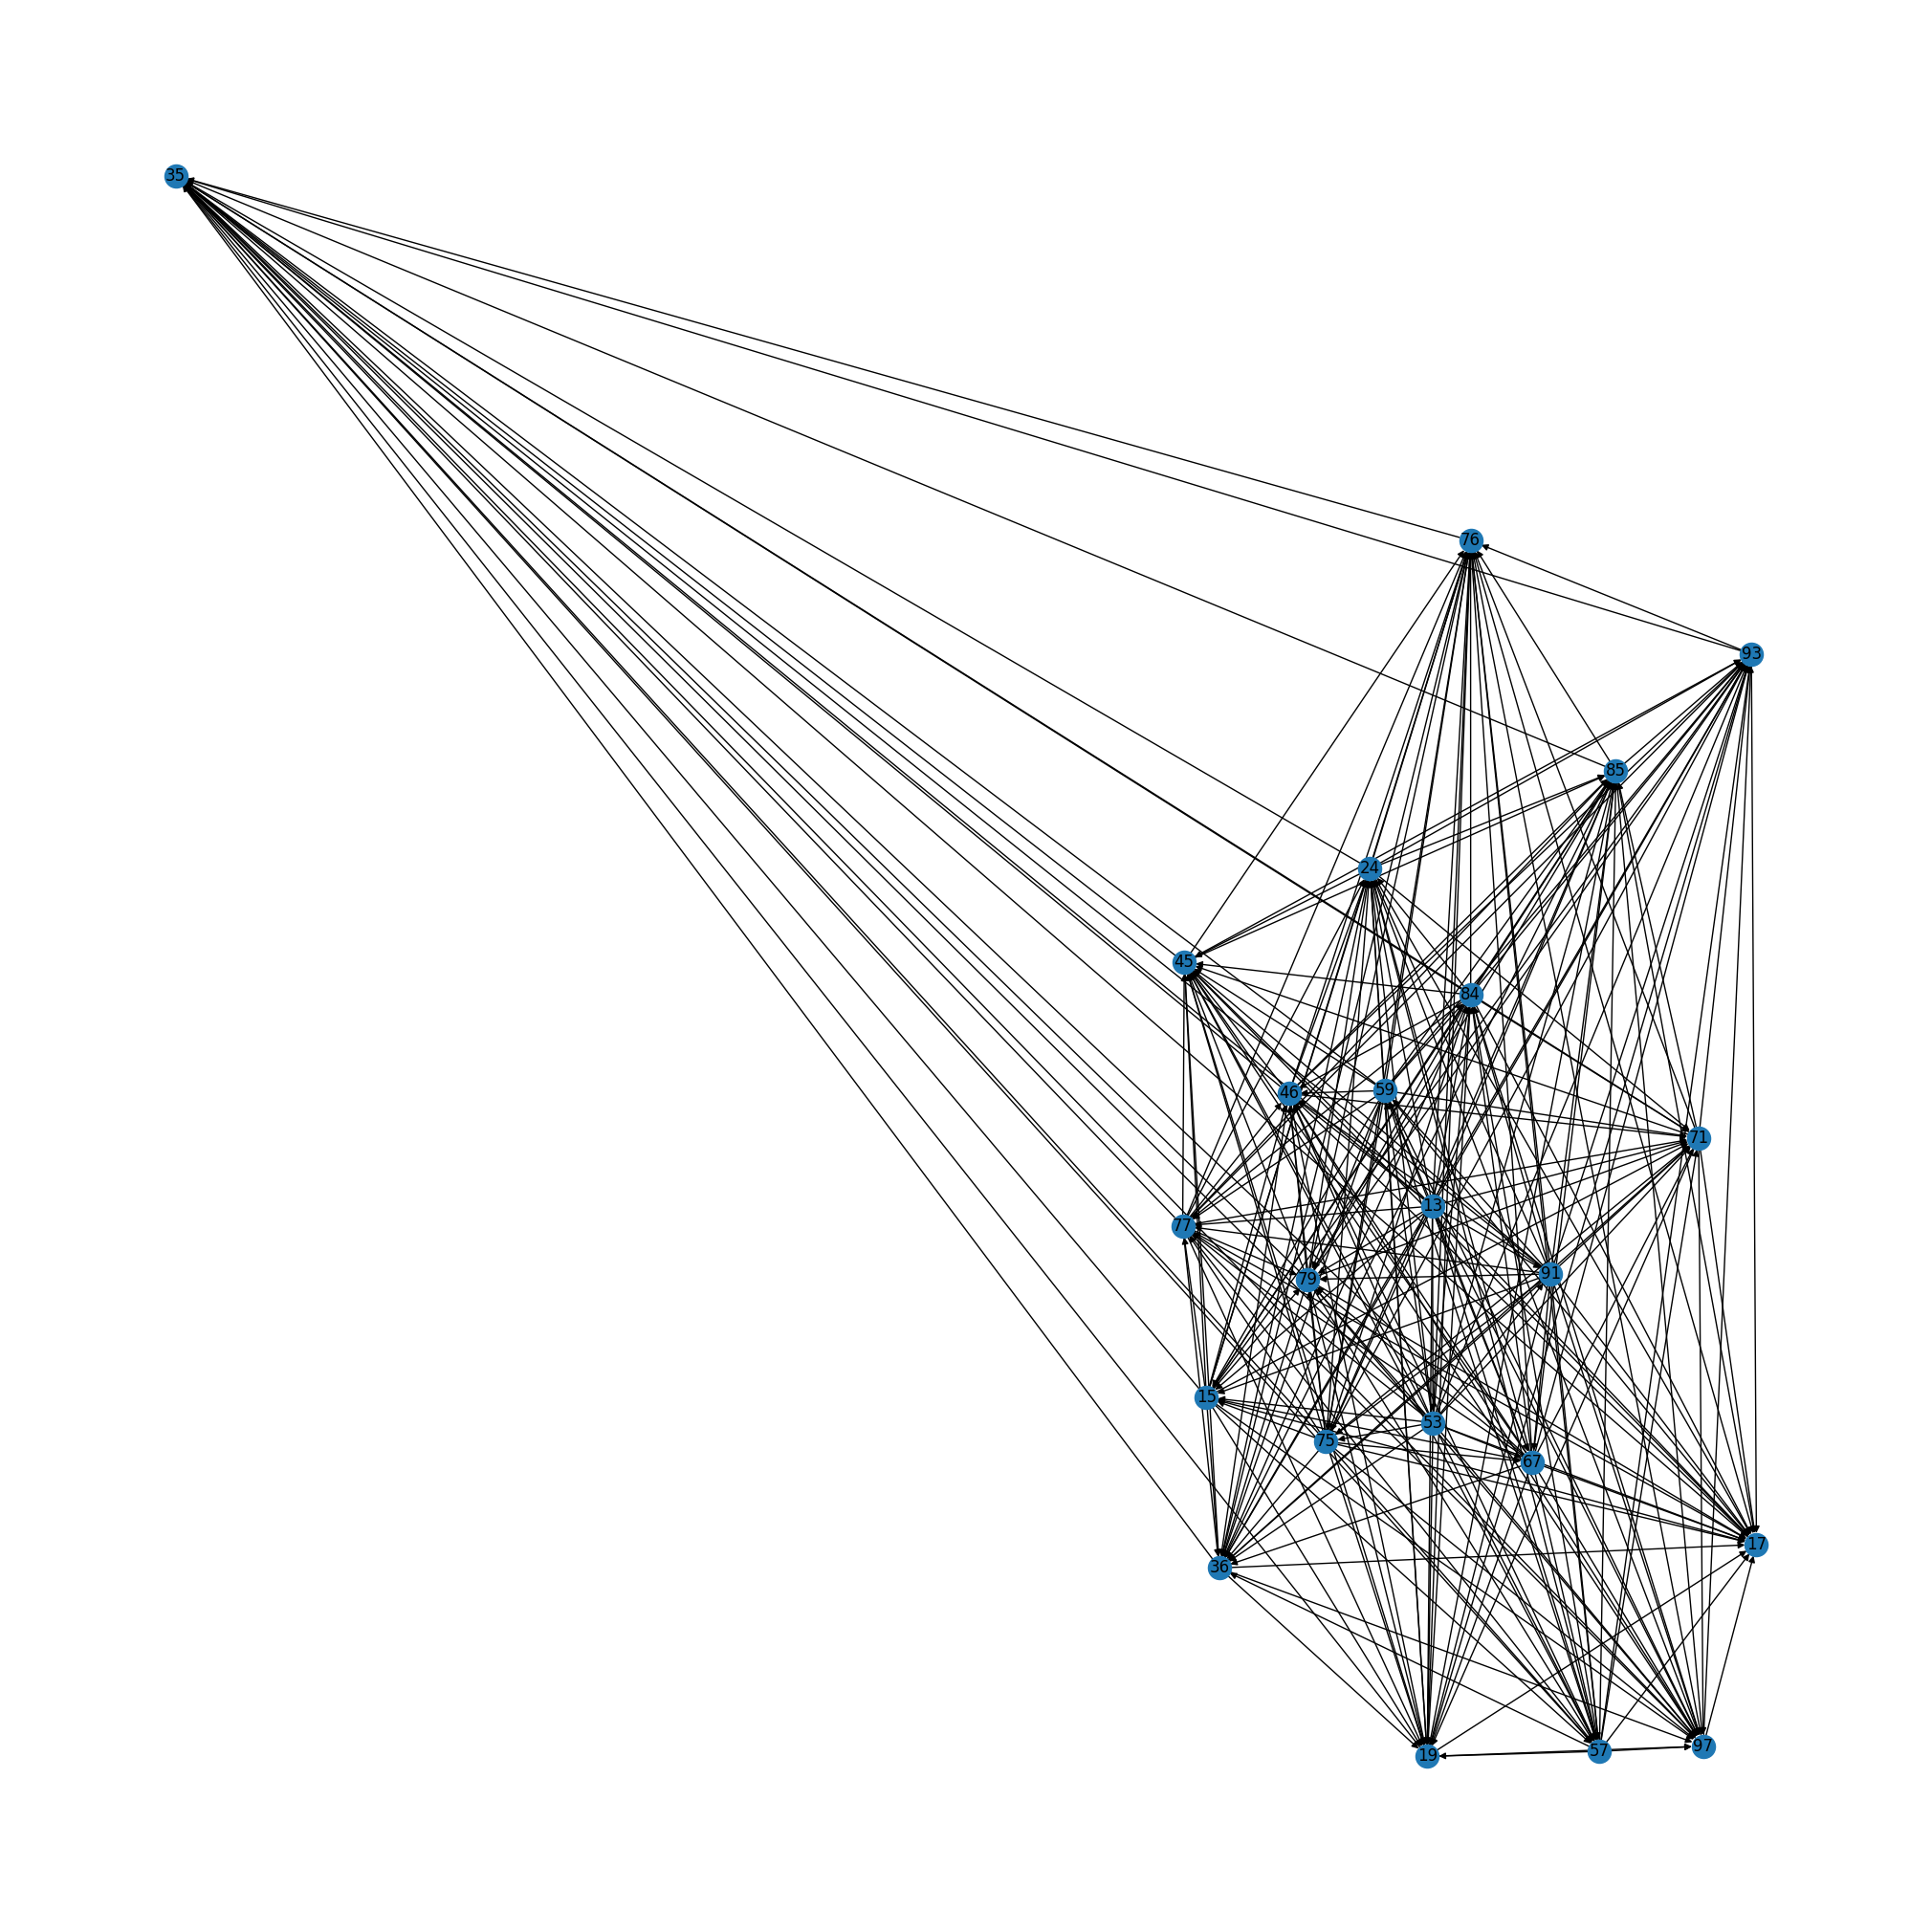

In [524]:
plt.figure(figsize=(20, 20))
nx.draw(directed_subgraph, with_labels=True)